# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

642

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
counter = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        counter = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (counter, set_count, city))

    # Add 1 to the record count
    counter += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | lewistown
Processing Record 3 of Set 1 | andilamena
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 6 of Set 1 | qaanaaq
Processing Record 7 of Set 1 | inhambane
Processing Record 8 of Set 1 | ponta do sol
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | anadyr
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | belaya gora
Processing Record 14 of Set 1 | torbay
Processing Record 15 of Set 1 | padang
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | ust-ishim
Processing Record 18 of Set 1 | nuuk
Processing Record 19 of Set 1 | namibe
Processing Record 20 of Set 1 | atuona
Processing Record 21 of Set 1 | busselton
Processing Record 22 of Set 1 | butaritari
Processin

Processing Record 33 of Set 4 | yellowknife
Processing Record 34 of Set 4 | beitbridge
Processing Record 35 of Set 4 | nanakuli
Processing Record 36 of Set 4 | dikson
Processing Record 37 of Set 4 | kungurtug
Processing Record 38 of Set 4 | vigevano
Processing Record 39 of Set 4 | havre-saint-pierre
Processing Record 40 of Set 4 | hualmay
Processing Record 41 of Set 4 | galiwinku
City not found. Skipping...
Processing Record 42 of Set 4 | sandviken
Processing Record 43 of Set 4 | cayenne
Processing Record 44 of Set 4 | troitsko-pechorsk
Processing Record 45 of Set 4 | la ronge
Processing Record 46 of Set 4 | port hedland
Processing Record 47 of Set 4 | bodden town
Processing Record 48 of Set 4 | batabano
Processing Record 49 of Set 4 | inyonga
Processing Record 0 of Set 5 | saint-louis
Processing Record 1 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 2 of Set 5 | port townsend
Processing Record 3 of Set 5 | one hundred mile house
City not found. Skippi

Processing Record 17 of Set 8 | kaoma
Processing Record 18 of Set 8 | hokitika
Processing Record 19 of Set 8 | bull savanna
Processing Record 20 of Set 8 | baymak
Processing Record 21 of Set 8 | hihifo
City not found. Skipping...
Processing Record 22 of Set 8 | cam pha
City not found. Skipping...
Processing Record 23 of Set 8 | imeni karla libknekhta
Processing Record 24 of Set 8 | tautii margheraus
City not found. Skipping...
Processing Record 25 of Set 8 | rorvik
Processing Record 26 of Set 8 | pak phanang
Processing Record 27 of Set 8 | neiafu
Processing Record 28 of Set 8 | inderborskiy
City not found. Skipping...
Processing Record 29 of Set 8 | tawkar
City not found. Skipping...
Processing Record 30 of Set 8 | liuhe
Processing Record 31 of Set 8 | vitim
Processing Record 32 of Set 8 | araguaina
Processing Record 33 of Set 8 | sant feliu de guixols
Processing Record 34 of Set 8 | pointe michel
Processing Record 35 of Set 8 | bukama
Processing Record 36 of Set 8 | concepcion
Process

Processing Record 3 of Set 12 | san cristobal
Processing Record 4 of Set 12 | bhabua
Processing Record 5 of Set 12 | lorengau
Processing Record 6 of Set 12 | mbanza-ngungu
Processing Record 7 of Set 12 | siparia
Processing Record 8 of Set 12 | bonthe
Processing Record 9 of Set 12 | damietta
Processing Record 10 of Set 12 | goderich
Processing Record 11 of Set 12 | moree
Processing Record 12 of Set 12 | saint-georges
Processing Record 13 of Set 12 | rocha
Processing Record 14 of Set 12 | piacabucu
Processing Record 15 of Set 12 | robertsport
Processing Record 16 of Set 12 | otradnoye
Processing Record 17 of Set 12 | nemuro
Processing Record 18 of Set 12 | wanaka
Processing Record 19 of Set 12 | bahia honda
Processing Record 20 of Set 12 | vlasenica
Processing Record 21 of Set 12 | kuche
City not found. Skipping...
Processing Record 22 of Set 12 | le port
Processing Record 23 of Set 12 | salina
Processing Record 24 of Set 12 | ambodifototra
City not found. Skipping...
Processing Record 2

In [5]:
WeatherPy_df = pd.DataFrame(city_data)

WeatherPy_df.to_csv("WeatherPy.csv", index=False)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
WeatherPy_df.count()

City          570
Cloudiness    570
Country       570
Date          570
Humidity      570
Lat           570
Lng           570
Max Temp      570
Wind Speed    570
dtype: int64

In [7]:
WeatherPy_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,punta arenas,40,CL,1563642804,80,-53.16,-70.91,35.60,13.87
1,lewistown,1,US,1563642540,70,40.39,-90.15,93.00,9.17
2,andilamena,13,MG,1563642804,95,-17.01,48.57,59.56,5.48
3,bethel,90,US,1563642737,100,60.79,-161.76,51.80,8.05
4,qaanaaq,99,GL,1563642805,81,77.48,-69.36,41.92,3.24


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

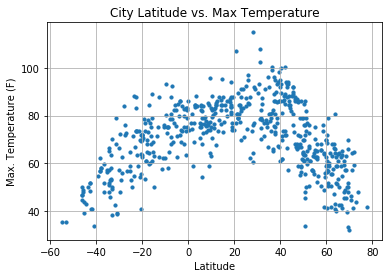

In [8]:
# Build a scatter plot for each data type
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Max Temp"], marker="o", s=10)

# Create labels and title for graph
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("ScatterPlot/Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

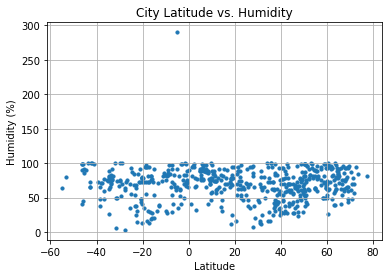

In [9]:
# Build a scatter plot for each data type
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Humidity"], marker="o", s=10)

# Create labels and title for graph
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("ScatterPlot/Humidity_vs_Latitude.png")

# Show plot
plt.show()


#### Latitude vs. Cloudiness Plot

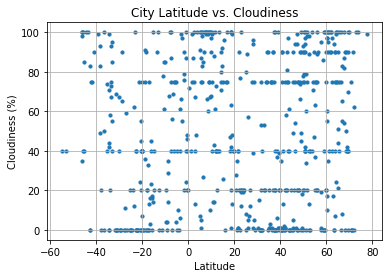

In [10]:
# Build a scatter plot for each data type
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Cloudiness"], marker="o", s=10)

# Create labels and title for graph
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("ScatterPlot/Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

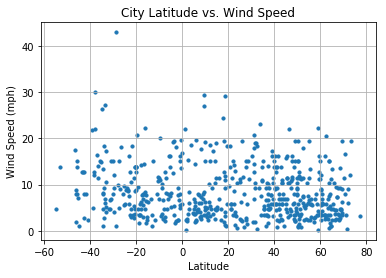

In [11]:
# Build a scatter plot for each data type
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Wind Speed"], marker="o", s=10)

# Create labels and title for graph
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("ScatterPlot/WindSpeed_vs_Latitude.png")

# Show plot
plt.show()

In [ ]:
#Observation1:The max temperature peaks near the equator as expected 
#Observation2: Cloudiness and humidity don't show a strong correlation to latitude, but the visualizations show a wide range of values at similar latitudes.
#Observation3: All the cities mainly have a wind speed lower than 20mph